In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D
from tensorflow.keras.models import Model


print(tf.__version__)
# Load in the data
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape:", x_train.shape)
print("y_train.shape", y_train.shape)

# number of classes
K = len(set(y_train))
print("number of classes:", K)


2.9.2
x_train.shape: (50000, 32, 32, 3)
y_train.shape (50000,)
number of classes: 10


In [ ]:
# Build the model using the functional API
i = Input(shape=x_train[0].shape) #Adesso l'input ha una certa profondità RGB (32x32x3) ma lo capisce da se prendendo come input la shape della prima immagine
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [ ]:
# Compile and fit
# Note: make sure you are using the GPU for this!
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5872 - accuracy: 0.4205 - val_loss: 1.3231 - val_accuracy: 0.5162
Epoch 2/15
1563/1563 [==============================] - 11s 7ms/step - loss: 1.3179 - accuracy: 0.5236 - val_loss: 1.1970 - val_accuracy: 0.5663
Epoch 3/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1993 - accuracy: 0.5674 - val_loss: 1.0986 - val_accuracy: 0.6097
Epoch 4/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1076 - accuracy: 0.6058 - val_loss: 1.0165 - val_accuracy: 0.6393
Epoch 5/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0347 - accuracy: 0.6301 - val_loss: 1.0107 - val_accuracy: 0.6462
Epoch 6/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9705 - accuracy: 0.6547 - val_loss: 0.9463 - val_accuracy: 0.6679
Epoch 7/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9155 - accuracy: 0.6714 - val_loss: 0.9232 - val_accuracy

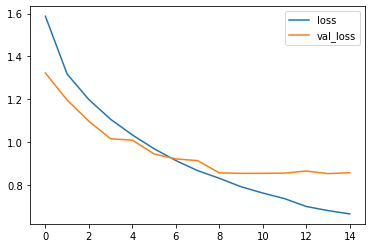

In [ ]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

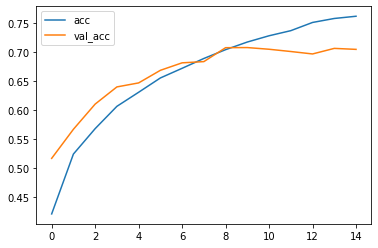

In [ ]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

The validation accuracy plateau shows some overfitting, it is fitting the noise.
val_acc should be higher then the training accuracy

313/313 [==============================] - 1s 2ms/step


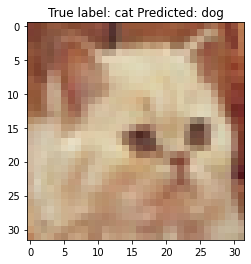

In [ ]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

# Show some misclassified examples
p_test = model.predict(x_test).argmax(axis=1)
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

